In [12]:
#first you need to import the packages we will use
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import fiona as fi
import shapely as shp
import pyproj as pyproj
import cartopy.crs as ccrs
import pandas as pd

#define the file you will investigate
tfile1='ERA5_2deg_temperature.model_level_137.daily.2019.nc'

#load in the dataset using xarray
tds=xr.open_dataset(tfile1)


In [13]:
#Take a look at the dataset properties
tds
#notice it has 3 dimensions, time x lat x lon

<xarray.Dataset>
Dimensions:  (time: 365, lat: 145, lon: 288)
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 90.0 88.75 87.5 86.25 ... -86.25 -87.5 -88.75 -90.0
  * time     (time) float64 7.374e+05 7.374e+05 ... 7.378e+05 7.378e+05
Data variables:
    t        (time, lat, lon) float64 ...

In [14]:
#load the data into memory
lon=tds.lon.values #pull out the lon
lat=tds.lat.values #pull out the lat
t=1.8*(tds.t.values-273.15)+32 #pull out the t variable (temperature), convert to fahrenheit

# Generate a date range for the entire year 2019
timedr = pd.date_range(start='2019-01-01', end='2019-12-31', freq='D')
# Convert to a list of datetime objects
timedt = timedr.to_pydatetime().tolist()

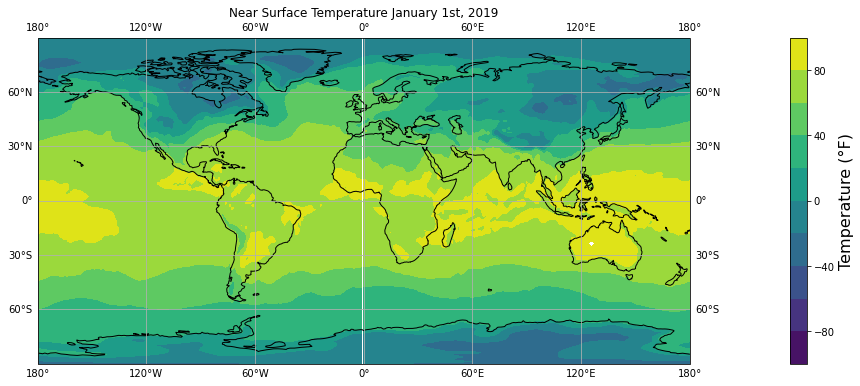

In [15]:
#python indices start at 0, and each index corresponds to a certain value along that dimension
#for example, index 0 in the 1st dimension corresponds to January 1st 2918, and index 364 is Dec. 31st
tnow=t[0,:,:] #0 means the 1st index in the 1st dimension, : means all indices in the 2nd (lat) and 3rd (lon) dimensions



# Set the color axis limits
color_min = -100
color_max = 100
numberofsteps=11
colorlevels=np.linspace(color_min, color_max, numberofsteps)


# Initialize the figure with the specified projection
fig = plt.figure(figsize=(36, 6))
# Add a subplot to the figure, in this case it's a 1 x 1 subplot and we focus on the 1st entry (1,1,1,..
# We also have to specify a map projection, projection=ccrs.PlateCarree(central_longitude=0)
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))

# Plot a filled contour of tnow with specified color axis limits
contour_plot1 = axs.contourf(lon, lat, tnow, levels=colorlevels, vmin=color_min, vmax=color_max)

# Add coastlines to the plot
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label containing the degree symbol and adjust font size
cbar = fig.colorbar(contour_plot1)
cbar.set_label('Temperature (°F)', fontsize=16)

# Add a title to the plot
plt.title('Near Surface Temperature January 1st, 2019')

# Show the plot
plt.show()

In [16]:
#Answer the following questions to check for understanding, you can type it right into the notebook

#1. What colors do you see near the equator? What about near the poles? Does this make sense according to the colorbar?

#2. Where is it coldest?

#3. Which is warmer, the Northern Hemisphere or the Southern Hemisphere?



In [17]:
#What's next is some tasks to practice your coding skills. It's probably best to copy and paste some of the code above 
#and modify where needed. Feel free to explore and change the map projections and extent if you'd like 

#1. Plot the temperature for January 3rd, 2019

In [18]:
#2. Plot the temperature for June 1st, 2019

In [19]:
#3. Plot the temperature for August 31st, 2019

In [20]:
#4. Plot the temperature for your birthday or someone you love, 2019

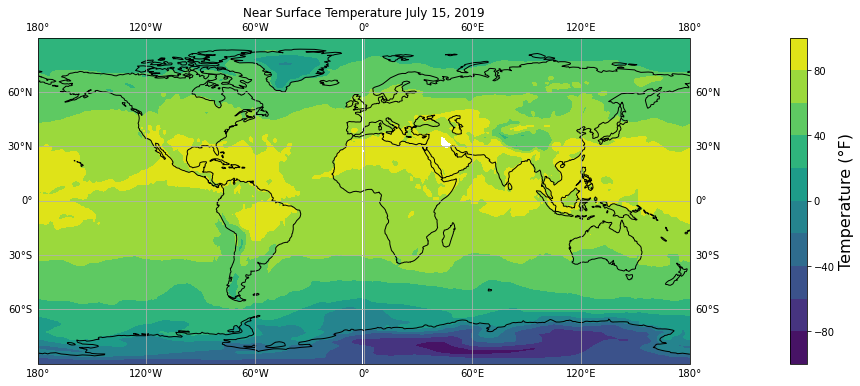

In [21]:
# here's an easier way to find out where the August 25th index is
taug25idx=np.where((timedr.month==8 ) & (timedr.day==25))[0][0]

taug25=t[taug25idx,:,:]

# Set the color axis limits
color_min = -100
color_max = 100
numberofsteps=11
colorlevels=np.linspace(color_min, color_max, numberofsteps)


# Initialize the figure with the specified projection
fig = plt.figure(figsize=(36, 6))
# Add a subplot to the figure, in this case it's a 1 x 1 subplot and we focus on the 1st entry (1,1,1,..
# We also have to specify a map projection, projection=ccrs.PlateCarree(central_longitude=0)
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))

# Plot a filled contour of tnow with specified color axis limits
contour_plot1 = axs.contourf(lon, lat, taug25, levels=colorlevels, vmin=color_min, vmax=color_max)

# Add coastlines to the plot
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label containing the degree symbol and adjust font size
cbar = fig.colorbar(contour_plot1)
cbar.set_label('Temperature (°F)', fontsize=16)

# Add a title to the plot
plt.title('Near Surface Temperature August 25, 2019')

# Show the plot
plt.show()


In [22]:
# Critical thinking: Look at your plots for January and your plots of August. How do the Northern and 
# Southern Hemisphere's compare in both of these months?

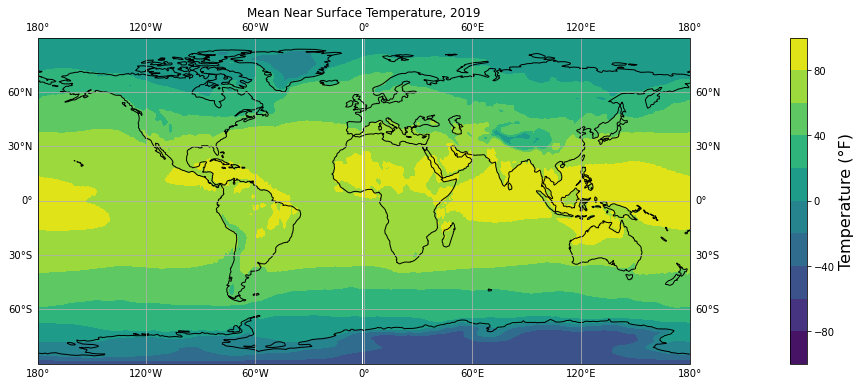

In [23]:
# now let's plot the average temperature for the entire year

tmean=t.mean(axis=0)

# Set the color axis limits
color_min = -100
color_max = 100
numberofsteps=11
colorlevels=np.linspace(color_min, color_max, numberofsteps)

# Initialize the figure with the specified projection
fig = plt.figure(figsize=(36, 6))
# Add a subplot to the figure, in this case it's a 1 x 1 subplot and we focus on the 1st entry (1,1,1,..
# We also have to specify a map projection, projection=ccrs.PlateCarree(central_longitude=0)
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))

# Plot a filled contour of tnow with specified color axis limits
contour_plot1 = axs.contourf(lon, lat, tmean, levels=colorlevels, vmin=color_min, vmax=color_max)

# Add coastlines to the plot
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label containing the degree symbol and adjust font size
cbar = fig.colorbar(contour_plot1)
cbar.set_label('Temperature (°F)', fontsize=16)

# Add a title to the plot
plt.title('Mean Near Surface Temperature, 2019')

# Show the plot
plt.show()

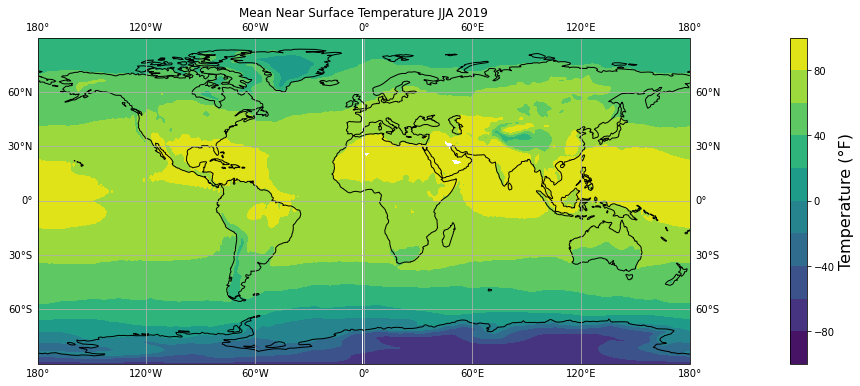

In [24]:
# we can also use this where function to find all of the summer days, and see what the average summer temperature was like for this year
# summer is usually defined as June, July, August a.k.a. JJA 
jjaidx=np.where((timedr.month==6) | (timedr.month==7) | (timedr.month==8))[0] # note '|' means 'or'


# Set the color axis limits
color_min = -100
color_max = 100
numberofsteps=11
colorlevels=np.linspace(color_min, color_max, numberofsteps)


# the average over an entire set of years or seasons is called a climatology, usually you want to calculate a climatology using multiple years of data
# but for learning purposes we will calculate the summer climatology just using the 2019 data

# now let's take the average over summer 
tmeanjja=t[jjaidx,:,:].mean(axis=0)


# Initialize the figure with the specified projection
fig = plt.figure(figsize=(36, 6))
# Add a subplot to the figure, in this case it's a 1 x 1 subplot and we focus on the 1st entry (1,1,1,..
# We also have to specify a map projection, projection=ccrs.PlateCarree(central_longitude=0)
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))

# Plot a filled contour of tnow with specified color axis limits
contour_plot1 = axs.contourf(lon, lat, tmeanjja, levels=colorlevels, vmin=color_min, vmax=color_max)

# Add coastlines to the plot
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label containing the degree symbol and adjust font size
cbar = fig.colorbar(contour_plot1)
cbar.set_label('Temperature (°F)', fontsize=16)

# Add a title to the plot
plt.title('Mean Near Surface Temperature JJA 2019')

# Show the plot
plt.show()

In [25]:
# plot the average temperature for the other seasons, DJF, MAM, and SON



In [26]:
# how do the seasons compare depending on what part of the globe you are at? Do your plots make sense? How do you know?

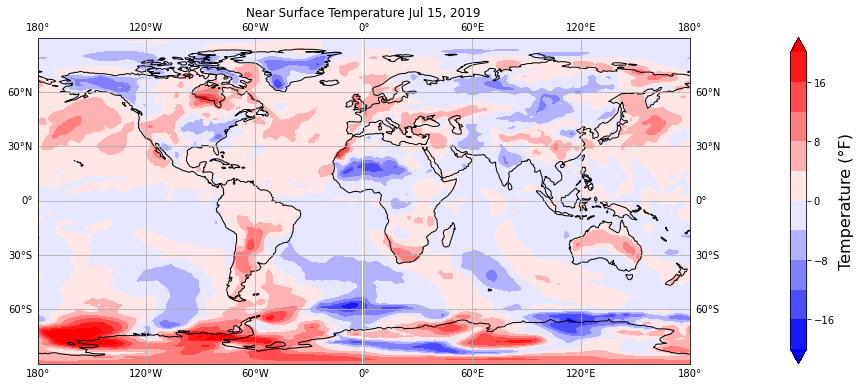

In [27]:
# The next thing we want to calculate is the anomaly. The anomaly is the deviation from the average, or in other words the difference from the climatology

#let's calculate the temperature anomaly on August 25th, using the "climatology" (or average) calculated for JJA
tanomaug25=taug25-tmeanjja

# Set the color axis limits
color_min = -20
color_max = -color_min
numberofsteps=11
colorlevels=np.linspace(color_min, color_max, numberofsteps)



# Initialize the figure with the specified projection
fig = plt.figure(figsize=(36, 6))
# Add a subplot to the figure, in this case it's a 1 x 1 subplot and we focus on the 1st entry (1,1,1,..
# We also have to specify a map projection, projection=ccrs.PlateCarree(central_longitude=0)
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))

# Plot a filled contour of tnow with specified color axis limits
contour_plot1 = axs.contourf(lon, lat, tanomaug25, levels=colorlevels, vmin=color_min, vmax=color_max,cmap='bwr', extend="both")

# Add coastlines to the plot
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label containing the degree symbol and adjust font size
cbar = fig.colorbar(contour_plot1)
cbar.set_label('Temperature (°F)', fontsize=16)

# Add a title to the plot
plt.title('Near Surface Temperature Anomaly Aug 25, 2019')

# Show the plot
plt.show()

In [28]:
# the anomaly tells you where it is hotter or colder than usual 

# where is it hotter and colder than usual?

#where is it the most abnormally hot? where is it the most abnormally cold?

In [29]:
# calculate the temperature anomaly for your birthday

In [30]:
# calculate the temperature anomaly for the birthday of someone you love

In [31]:
# calculate the temperature anomaly for the birthday of someone you admire

In [36]:
import sys
import pkg_resources

# Function to get imported packages and their versions
def get_imported_packages():
    imported_packages = set(sys.modules) & {pkg.key for pkg in pkg_resources.working_set}
    package_versions = {pkg: pkg_resources.get_distribution(pkg).version for pkg in imported_packages}
    return package_versions

# Print the packages and their versions
package_versions = get_imported_packages()
for package, version in package_versions.items():
    print(f"{package}: {version}")

fiona: 1.8.22
ptyprocess: 0.7.0
pytz: 2022.1
markupsafe: 2.1.1
toolz: 0.12.0
pickleshare: 0.7.5
defusedxml: 0.7.1
babel: 2.10.3
scipy: 1.8.1
certifi: 2023.5.7
parso: 0.8.3
cftime: 1.6.1
simplejson: 3.17.6
entrypoints: 0.4
numpy: 1.23.1
tqdm: 4.64.0
fsspec: 2022.5.0
jedi: 0.18.1
matplotlib: 3.5.2
debugpy: 1.6.0
findlibs: 0.0.2
psutil: 5.9.1
cfgrib: 0.9.10.1
decorator: 5.1.1
zipp: 3.8.0
shapely: 1.8.5.post1
numexpr: 2.8.3
unicodedata2: 14.0.0
traitlets: 5.3.0
backcall: 0.2.0
wcwidth: 0.2.5
platformdirs: 2.5.2
six: 1.15.0
kiwisolver: 1.4.4
tornado: 6.1
numba: 0.56.4
cffi: 1.15.1
urllib3: 1.26.10
executing: 0.8.3
pyparsing: 3.0.9
idna: 3.3
lz4: 4.0.0
eccodes: 1.4.2
chardet: 5.0.0
pygments: 2.12.0
cartopy: 0.21.0
pexpect: 4.8.0
cycler: 0.11.0
xarray: 2023.2.0
requests: 2.28.1
colorama: 0.4.5
llvmlite: 0.39.1
asttokens: 2.0.5
packaging: 21.3
pooch: 1.7.0
metpy: 1.5.1
pyproj: 3.3.1
cloudpickle: 2.1.0
dask: 2022.7.0
cytoolz: 0.12.0
tblib: 1.7.0
pycparser: 2.21
ipykernel: 6.15.1
pint: 0.22
pand